In [2]:
# relative paths to the movie lens data set for movies file and ratings file
movies_path = './ml-latest-small/movies.csv'

# import DataFrame from pandas package so that we can work with this tabular data
import pandas as pd
from pandas import DataFrame as df

movies_df = pd.read_csv(movies_path)

# now that we have a DataFrame lets peek into the data and see how it looks
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
# now lets see how many movies are there in this data
len(movies_df.index)

9125

In [4]:
# we can also get high level information of the width and height of the data frame using shape property
movies_df.shape

(9125, 3)

In [6]:
# now we can access an element at a position using loc[x_pos][y_pos] syntax 
print(movies_df.loc[0][0])
print(movies_df.loc[0][1])
print(movies_df.loc[0][2])

1
Toy Story (1995)
Adventure|Animation|Children|Comedy|Fantasy


In [7]:
# we can explicitly set the index column if our data has a unique identifier for each row using set_index
movies_df.set_index('movieId')
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
# now lets find out how many animation vs comedy movies exist in this dataset

movies_df['genres_arr'] = movies_df['genres'].str.split('|')
movies_df.head()

,movieId,title,genres,genres_arr
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),Comedy,[Comedy]


In [10]:

animation_df = movies_df[movies_df.genres_arr.map(lambda x: 'Animation' in x)]
print('# of animation movies', len(animation_df.index))

romance_df = movies_df[movies_df.genres_arr.map(lambda x: 'Comedy' in x)]
print('# of romance movies', len(romance_df.index))

# of animation movies 447
# of romance movies 3315


In [12]:
# now lets find the real masala movies which has Action and Romance and Comedy and Thriller :)
masala_lambda = lambda x: set(['Romance','Comedy', 'Action', 'Thriller']).issubset(x)
masala_movies = movies_df[movies_df.genres_arr.map(masala_lambda)]
print('# of masala movies', len(masala_movies.index))
masala_movies

# of masala movies 6


,movieId,title,genres,genres_arr
344,380,True Lies (1994),Action|Adventure|Comedy|Romance|Thriller,"[Action, Adventure, Comedy, Romance, Thriller]"
1974,2468,Jumpin' Jack Flash (1986),Action|Comedy|Romance|Thriller,"[Action, Comedy, Romance, Thriller]"
3699,4719,Osmosis Jones (2001),Action|Animation|Comedy|Crime|Drama|Romance|Th...,"[Action, Animation, Comedy, Crime, Drama, Roma..."
3842,4956,"Stunt Man, The (1980)",Action|Adventure|Comedy|Drama|Romance|Thriller,"[Action, Adventure, Comedy, Drama, Romance, Th..."
4702,6564,Lara Croft Tomb Raider: The Cradle of Life (2003),Action|Adventure|Comedy|Romance|Thriller,"[Action, Adventure, Comedy, Romance, Thriller]"
6193,34435,Sholay (1975),Action|Adventure|Comedy|Musical|Romance|Thriller,"[Action, Adventure, Comedy, Musical, Romance, ..."


In [13]:
# now lets add another column to our dataframe which will count the number of genres for each movie
counter_lambda = lambda x: len(x)
movies_df['genre_count'] = movies_df.genres_arr.apply(counter_lambda)
movies_df.head()

,movieId,title,genres,genres_arr,genre_count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",5
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]",3
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]",2
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]",3
4,5,Father of the Bride Part II (1995),Comedy,[Comedy],1


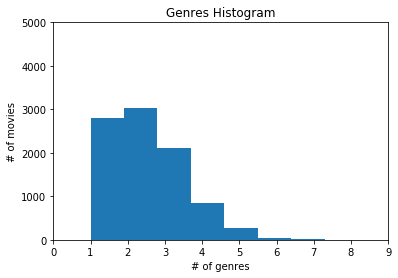

In [14]:
# now lets analyze how many genres do various movies have by plotting a histogram of genres

# introducing the matplotlib package which lets us plot charts, graphs in Python
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(movies_df.genre_count)
plt.title("Genres Histogram")
plt.xlabel("# of genres")
plt.ylabel("# of movies")
plt.axis([0, 9, 0, 5000])
plt.show()

In [17]:
# now lets see how many movies are there for each genre

from collections import Counter

flattened_genres = [item for sublist in movies_df.genres_arr for item in sublist]

genre_dict = dict(Counter(flattened_genres))

print(genre_dict)

{'Adventure': 1117, 'Animation': 447, 'Children': 583, 'Comedy': 3315, 'Fantasy': 654, 'Romance': 1545, 'Drama': 4365, 'Action': 1545, 'Crime': 1100, 'Thriller': 1729, 'Horror': 877, 'Mystery': 543, 'Sci-Fi': 792, 'Documentary': 495, 'IMAX': 153, 'War': 367, 'Musical': 394, 'Western': 168, 'Film-Noir': 133, '(no genres listed)': 18}


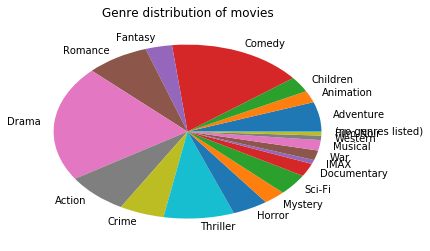

In [18]:
# now lets plot this genre distribution as a pie chart
plt.pie(genre_dict.values(), labels=genre_dict.keys())
plt.title('Genre distribution of movies')
plt.show()

In [19]:
# we can also save the plot as an image to share with other
plt.savefig('./movie-genres-pie.png')

[]

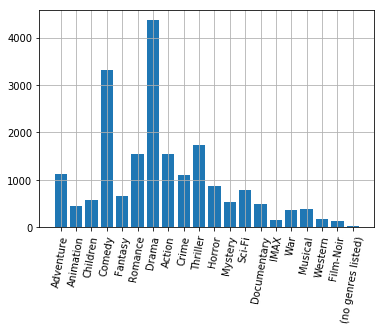

In [20]:
# we can also plot a bar chart (with grid lines and slanted x axis labels for better readability)
x = list(range(len(genre_dict)))
plt.xticks(x, genre_dict.keys(), rotation=80)
plt.bar(x, genre_dict.values())
plt.grid()
plt.plot()

In [21]:
# now lets move onto the movie ratings data
ratings_path = './ml-latest-small/ratings.csv'
ratings_df = pd.read_csv(ratings_path)

# lets see how the data looks
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [22]:
# how many ratings do we have?
print('# ratings', len(ratings_df.index))

# how many different movies have been rated?
print('# movies', len(ratings_df.movieId.unique()))

# what are the different ratings given by users?
print('rating values', ratings_df.rating.unique())


# ratings 100004
# movies 9066
rating values [ 2.5  3.   2.   4.   3.5  1.   5.   4.5  1.5  0.5]


In [23]:
# now lets find the average movie rating across all ratings

# introducing the numpy package which is used to find various stats out of data
import numpy as np

# lets find average rating using the numpy's mean method
np.mean(ratings_df.rating)

3.543608255669773

In [24]:
# lets find the median rating
np.median(ratings_df.rating)

4.0

In [25]:
# lets find the 30th percentile rating 
np.percentile(ratings_df.rating, 30)

3.0

In [26]:
# lets find the most common rating given by users to movies (called mode of the data)
from scipy import stats
stats.mode(ratings_df.rating)

ModeResult(mode=array([ 4.]), count=array([28750]))

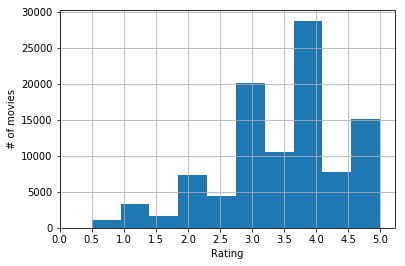

In [27]:
# now lets plot a histogram of movie ratings to get an overall picture
plt.hist(ratings_df.rating)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.xlabel('Rating')
plt.ylabel('# of movies')
plt.grid()
plt.show()

In [28]:
# now lets find the highest rated movies (highest average rating)
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [29]:
ratings_view = ratings_df[['movieId', 'rating']]
ratings_view.groupby(['movieId'], as_index=False).mean().sort_values(by='rating', ascending=False).head(10)

,movieId,rating
9065,163949,5.0
7297,71180,5.0
6629,51471,5.0
6662,52617,5.0
6704,53887,5.0
6717,54251,5.0
6726,54328,5.0
6785,55555,5.0
6836,56869,5.0
6843,57038,5.0


In [30]:
# now lets merge/join the movies_df and ratings_df so that we can see the actual movie titles of top 10 movies
merged_df = pd.merge(ratings_df, movies_df, on='movieId')
merged_df.head()

,userId,movieId,rating,timestamp,title,genres,genres_arr,genre_count
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama,[Drama],1
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama,[Drama],1
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama,[Drama],1
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama,[Drama],1
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama,[Drama],1


In [31]:
# now lets find the titles of the top 10 movies to see if we are missing on some awesome movies!
titles_df = merged_df[['movieId', 'title', 'rating']]
titles_df.groupby(['movieId', 'title'], as_index=False).mean().sort_values(by='rating', ascending=False).head(10)

,movieId,title,rating
9065,163949,The Beatles: Eight Days a Week - The Touring Y...,5.0
7297,71180,Padre padrone (1977),5.0
6629,51471,Amazing Grace (2006),5.0
6662,52617,Woman on the Beach (Haebyeonui yeoin) (2006),5.0
6704,53887,O Lucky Man! (1973),5.0
6717,54251,Dorian Blues (2004),5.0
6726,54328,My Best Friend (Mon meilleur ami) (2006),5.0
6785,55555,"Edge of Heaven, The (Auf der anderen Seite) (2...",5.0
6836,56869,Drained (O cheiro do Ralo) (2006),5.0
6843,57038,To the Left of the Father (Lavoura Arcaica) (2...,5.0


In [32]:
# these movies are not what we expected to be in the Top 10 movies list, something's wrong here
# lets check how many ratings have these movies received, lets take an example of movieId 163949
len(merged_df[merged_df['movieId'] == 163949].index)

1

In [33]:
# now lets only consider movies which have atleast 100 ratings and see how the top 10 movies change
temp_df = titles_df.groupby(['movieId', 'title'], as_index=False).count()
well_rated_df = temp_df[temp_df['rating'] > 100].sort_values(by='rating', ascending=False)
well_rated_df.head()

,movieId,title,rating
321,356,Forrest Gump (1994),341
266,296,Pulp Fiction (1994),324
284,318,"Shawshank Redemption, The (1994)",311
525,593,"Silence of the Lambs, The (1991)",304
232,260,Star Wars: Episode IV - A New Hope (1977),291


In [34]:
# now lets created a filtered df from merged_df which only has these movies and then find top 20 movies
filtered_df = merged_df[merged_df['movieId'].apply(lambda x: x in list(well_rated_df['movieId']))]
titles_df = filtered_df[['title', 'rating', 'movieId']]
titles_df.groupby(['movieId', 'title'], as_index=False).mean().sort_values(by='rating', ascending=False).head(20)

,movieId,title,rating
62,858,"Godfather, The (1972)",4.487500
27,318,"Shawshank Redemption, The (1994)",4.487138
81,1221,"Godfather: Part II, The (1974)",4.385185
10,50,"Usual Suspects, The (1995)",4.370647
43,527,Schindler's List (1993),4.303279
71,1193,One Flew Over the Cuckoo's Nest (1975),4.256944
55,608,Fargo (1996),4.256696
25,296,Pulp Fiction (1994),4.256173
117,2858,American Beauty (1999),4.236364
147,58559,"Dark Knight, The (2008)",4.235537


In [35]:
# Great, so far we have seen how to extract various stats from our datasets using NumPy, Pandas 
# and visualize our data using Matplotlib, now lets do some predictive analytics..

In [36]:
# now lets add a column called rating_year which depicts the year when the rating was given
import datetime
year_lambda = lambda x: int(datetime.datetime.fromtimestamp(x).strftime('%Y'))
merged_df['rating_year'] = merged_df['timestamp'].apply(year_lambda)
merged_df.head()

,userId,movieId,rating,timestamp,title,genres,genres_arr,genre_count,rating_year
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama,[Drama],1,2009
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama,[Drama],1,1996
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama,[Drama],1,2010
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama,[Drama],1,1996
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama,[Drama],1,1996


In [37]:
# now lets create a new data frame which contains number of ratings given on each year
ratings_per_year = merged_df.groupby(['rating_year'])['rating_year'].count()
ratings_per_year.head()

rating_year
1995       3
1996    6239
1997    3294
1998    1825
1999    5901
Name: rating_year, dtype: int64

In [43]:
# now lets get some stats on number of ratings per year

years = ratings_per_year.keys()
num_ratings = ratings_per_year.get_values()
print('average ratings per year', np.mean(num_ratings))
print('median ratings per year', np.median(num_ratings))
print('90% ratings per year', np.percentile(num_ratings, 90))

average ratings per year 4545.63636364
median ratings per year 4193.0
90% ratings per year 7105.9


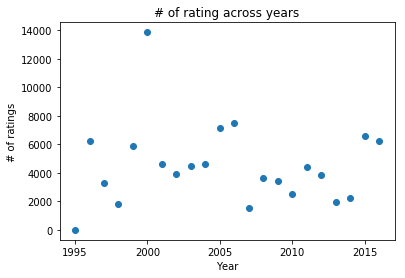

In [44]:
# now lets scatter plot this data to visualize how ratings are spead across years
plt.scatter(years, num_ratings)
plt.title('# of rating across years')
plt.xlabel('Year')
plt.ylabel('# of ratings')
plt.show()

In [45]:
# now lets try to build a linear regression model using which we will predict how many ratings we get each year
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(years, num_ratings)
print('Generated linear model is  y = ' + str(slope) + ' * x + ' + str(intercept))

Generated linear model is  y = -25.0208921513 * x + 54725.0355731


In [46]:
# now lets use the slope and intercept to create a predict function which will predict num_ratings given a year
def predict_num_ratings(year):
    return slope * year + intercept

predicted_ratings = predict_num_ratings(years)

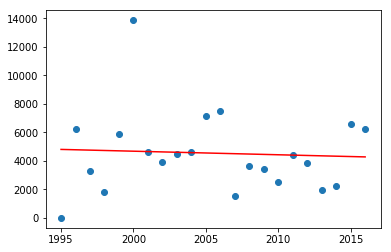

In [47]:
# now lets plot our predicted values along side the actual data to see how well we did
plt.scatter(years, num_ratings)
plt.plot(years, predicted_ratings, c='r')
plt.show()

In [49]:
# now lets see how good our prediction is by calculating the r-squared value
r_square = r_value ** 2
print('Linear Model r_square value', r_square)

Linear Model r_square value 0.00322580002687


In [50]:
# thats a poor model r_square ranges from 0 to 1, the close to 1 the better the model accuracy

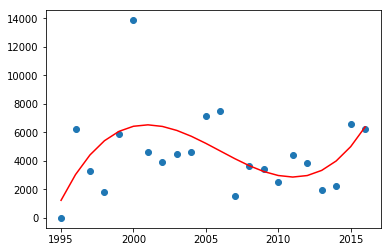

In [51]:
# now lets try a polynomial function instead of a linear function and see if that fits better
polynomial = np.poly1d(np.polyfit(years, num_ratings, 3))
plt.scatter(years, num_ratings)
plt.plot(years, polynomial(years), c='r')
plt.show()

In [53]:
# now lets calculate the r-square for this polynomial regression

from sklearn.metrics import r2_score
r2 = r2_score(num_ratings, polynomial(years))
print('Polynomial Model r_square value', r2)

Polynomial Model r_square value 0.27610439477


In [55]:
# now we can predict how many ratings we expect in any year using our polynomial function
print(polynomial(2017))          
print(polynomial(2018))    

8203.61991882
10488.4464874


In [ ]:
# awesome, now lets implement another important ML technique 'Classification'
